# Unsupervised methods for time series analysis

We will be using the mortgage affordability provided by Zillow https://www.zillow.com/research/data/

The project repository includes the data and utility functions to load and plot it

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import affordability_lib.utils as utils

afford_df = utils.get_affordability_df()
afford_df.head(10)

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03
324,394913,"New York, NY",1,0.261700,0.278316,0.284399,0.319438,0.379845,0.318970,0.337586,...,0.241961,0.240494,0.247387,0.245957,0.249606,0.241544,0.239503,0.240021,0.265376,0.269264
325,753899,"Los Angeles-Long Beach-Anaheim, CA",2,0.357694,0.388161,0.401762,0.459422,0.541508,0.464528,0.486750,...,0.383162,0.382531,0.396277,0.395686,0.402116,0.393042,0.390708,0.386895,0.430334,0.433476
326,394463,"Chicago, IL",3,0.261928,0.276790,0.276248,0.309709,0.353099,0.299344,0.295616,...,0.134913,0.134063,0.139074,0.137962,0.138784,0.134412,0.133701,0.132856,0.147025,0.149054
327,394514,"Dallas-Fort Worth, TX",4,0.301131,0.328453,0.340857,0.386321,0.452818,0.376912,0.394715,...,0.118163,0.117663,0.124935,0.128167,0.133517,0.131539,0.133219,0.135142,0.149861,0.152387
328,394974,"Philadelphia, PA",5,0.204333,0.215107,0.219247,0.247690,0.295396,0.248018,0.260259,...,0.141915,0.139100,0.142831,0.141625,0.142089,0.137387,0.135599,0.135064,0.148746,0.148559
329,394692,"Houston, TX",6,0.243178,0.265630,0.268049,0.294382,0.342770,0.291661,0.292763,...,0.112149,0.113520,0.118255,0.119155,0.122370,0.120863,0.120717,0.120675,0.132078,0.130511
330,395209,"Washington, DC",7,0.254252,0.264869,0.277353,0.314773,0.373035,0.319475,0.337635,...,0.174821,0.173381,0.178910,0.177032,0.178584,0.172367,0.169965,0.168010,0.185774,0.186239
331,394856,"Miami-Fort Lauderdale, FL",8,0.267852,0.284229,0.287053,0.332037,0.392403,0.334098,0.360938,...,0.181766,0.183585,0.194088,0.197580,0.203430,0.197855,0.198292,0.199508,0.221129,0.222176
332,394347,"Atlanta, GA",9,0.248301,0.264578,0.271742,0.312490,0.371988,0.307385,0.322451,...,0.113326,0.113214,0.117454,0.118066,0.120754,0.117895,0.117187,0.116937,0.130104,0.131081
333,394404,"Boston, MA",10,0.222021,0.237248,0.239940,0.276893,0.316496,0.271210,0.285134,...,0.212892,0.210786,0.216809,0.217371,0.221722,0.215844,0.214103,0.212644,0.236357,0.239656


In [50]:
import pandas as pd

plotdf.head()

RegionID,394304,394312,394318,394347,394355,394357,394358,394367,394378,394388,...,395134,395148,395160,395167,395169,395183,395209,753899,753906,753924
date,,,,,,,,,,,,,,,,,,,,,
1979-03,0.232680,0.287440,0.241254,0.248301,0.281276,0.293120,0.241090,0.320604,0.279537,0.261269,...,0.329093,0.262781,0.233772,0.290762,0.237118,0.291715,0.254252,0.357694,0.324803,0.303692
1979-06,0.247157,0.313798,0.242736,0.264578,0.291680,0.320723,0.262005,0.344172,0.293638,0.272639,...,0.351231,0.275551,0.242763,0.336807,0.249160,0.309812,0.264869,0.388161,0.329214,0.350751
1979-09,0.253609,0.321006,0.241687,0.271742,0.306315,0.327072,0.264234,0.352533,0.305817,0.271228,...,0.362340,0.283997,0.239239,0.325960,0.253414,0.324721,0.277353,0.401762,0.325394,0.382342
1979-12,0.277786,0.356240,0.283188,0.312490,0.356599,0.369596,0.293461,0.388893,0.327856,0.325152,...,0.403449,0.327575,0.272597,0.374332,0.284488,0.365309,0.314773,0.459422,0.394464,0.447982
1980-03,0.320509,0.432043,0.365602,0.371988,0.400885,0.416118,0.341429,0.464336,0.360372,0.344529,...,0.474701,0.372208,0.304646,0.441749,0.330377,0.454627,0.373035,0.541508,0.429323,0.550050


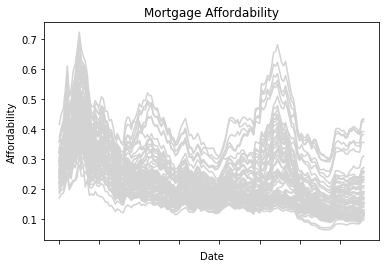

In [49]:
import matplotlib.pylab as plt

plotdf = utils.plot_affordability_series(afford_df)
plt.show()

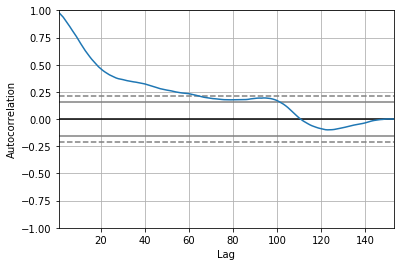

In [51]:
pd.plotting.autocorrelation_plot(plotdf)

## Task I: Clustering

(1) Use the kmeans algorithm to cluster the timeseries data. The
implementation of kmeans for sklearn is described here:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

You need to make some choices: 
  - Preprocessing: should you scale and center data before clustering?
  - Initialization: How will you choose starting centroids
  - Evaluation: How will you determine the number of clusters to use for next steps of analysis. Here are options implemented in sklearn: http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation. Here is an implementation of the gap statistic method shown in lecture (use at your discretion): https://github.com/Zelazny7/gap-statistic/blob/master/gap.py
  
Make sure to include your choices for the above in your writeup.

In [61]:
# Check the missing values 
afford_df.isna().head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
328,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# Fill missing values with mean column values in the data set
afford_df.fillna(afford_df.mean(), inplace=True)

In [64]:
print(afford_df.isna().sum())
#afford_df.info()
#afford_df.describe()

RegionID      0
RegionName    0
SizeRank      0
1979-03       0
1979-06       0
1979-09       0
1979-12       0
1980-03       0
1980-06       0
1980-09       0
1980-12       0
1981-03       0
1981-06       0
1981-09       0
1981-12       0
1982-03       0
1982-06       0
1982-09       0
1982-12       0
1983-03       0
1983-06       0
1983-09       0
1983-12       0
1984-03       0
1984-06       0
1984-09       0
1984-12       0
1985-03       0
1985-06       0
1985-09       0
             ..
2009-12       0
2010-03       0
2010-06       0
2010-09       0
2010-12       0
2011-03       0
2011-06       0
2011-09       0
2011-12       0
2012-03       0
2012-06       0
2012-09       0
2012-12       0
2013-03       0
2013-06       0
2013-09       0
2013-12       0
2014-03       0
2014-06       0
2014-09       0
2014-12       0
2015-03       0
2015-06       0
2015-09       0
2015-12       0
2016-03       0
2016-06       0
2016-09       0
2016-12       0
2017-03       0
Length: 156, dtype: int6

In [79]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
train_df, test_df = utils.split_train_test(afford_df)

In [88]:
train_df.head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2012-09,2012-12,2013-03,2013-06,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12
324,394913,"New York, NY",1,0.261700,0.278316,0.284399,0.319438,0.379845,0.318970,0.337586,...,0.224406,0.217553,0.224845,0.241536,0.260265,0.261124,0.258286,0.253598,0.252561,0.241961
325,753899,"Los Angeles-Long Beach-Anaheim, CA",2,0.357694,0.388161,0.401762,0.459422,0.541508,0.464528,0.486750,...,0.304163,0.300080,0.320920,0.359241,0.399297,0.402892,0.400288,0.393393,0.395619,0.383162
326,394463,"Chicago, IL",3,0.261928,0.276790,0.276248,0.309709,0.353099,0.299344,0.295616,...,0.121624,0.117433,0.121061,0.131412,0.141545,0.142888,0.141657,0.138968,0.140140,0.134913
327,394514,"Dallas-Fort Worth, TX",4,0.301131,0.328453,0.340857,0.386321,0.452818,0.376912,0.394715,...,0.104923,0.101957,0.105754,0.114501,0.123787,0.125153,0.123385,0.121437,0.121808,0.118163
328,394974,"Philadelphia, PA",5,0.204333,0.215107,0.219247,0.247690,0.295396,0.248018,0.260259,...,0.138880,0.134923,0.139083,0.148469,0.156956,0.155812,0.153202,0.149514,0.148801,0.141915


In [81]:
train_X, train_y = utils.get_X_y(train_df)

In [82]:
print(train_X)

[[0.26170029 0.27831582 0.28439863 0.3194383 ]
 [0.27831582 0.28439863 0.3194383  0.37984483]
 [0.28439863 0.3194383  0.37984483 0.31897013]
 ...
 [0.11371621 0.12283006 0.13093484 0.12856396]
 [0.12283006 0.13093484 0.12856396 0.12404706]
 [0.13093484 0.12856396 0.12404706 0.1187748 ]]


In [83]:
print(train_y)

[0.37984483 0.31897013 0.33758634 ... 0.12404706 0.1187748  0.11657912]


In [75]:
# cluster records into 9
kmeans = KMeans(n_clusters=9, max_iter=600, algorithm = 'auto',n_jobs=4)
predict_y = kmeans.fit_predict(train_X)

In [76]:
from sklearn import metrics

metrics.adjusted_rand_score(train_y, predict_y)

0.0

In [104]:
# clustering code goes here

# cluster records into 9
kmeans = KMeans(n_clusters=9, max_iter=600, algorithm = 'auto',n_jobs=4)
predict_y = kmeans.fit_predict(train_X)

In [105]:
print(predict_y)

[1 7 7 ... 0 0 0]


In [125]:
print(kmeans.labels_)

[1 7 7 ... 0 0 0]


In [123]:
print(kmeans.cluster_centers_.reshape(9,4))

[[0.12844834 0.1272384  0.12647816 0.12621261]
 [0.29016363 0.28862467 0.28780088 0.28689486]
 [0.3966458  0.39802504 0.39796112 0.39570806]
 [0.20562167 0.20421858 0.20300357 0.20197974]
 [0.5670103  0.57523681 0.57532447 0.56632262]
 [0.16754537 0.1666468  0.16599233 0.16546184]
 [0.24395033 0.24234076 0.24077579 0.23981204]
 [0.33941965 0.33950599 0.33863967 0.3382334 ]
 [0.4650058  0.46838433 0.46862636 0.46677602]]


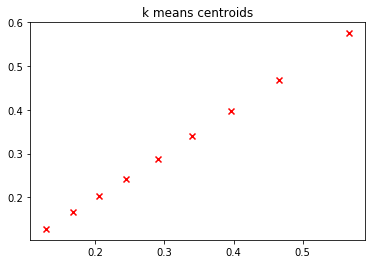

In [130]:
centers = np.array(kmeans.cluster_centers_)

plt.plot()
plt.title('k means centroids')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

In [113]:
print(utils.predict_correct(train_X, train_y, kmeans))

0.0


In [131]:
print(kmeans.labels_)

[1 7 7 ... 0 0 0]


In [86]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train_X)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=9, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
print(utils.predict_correct(train_X, train_y, kmeans))

0.0


In [67]:
from sklearn import metrics

test_X, test_y = utils.get_X_y(test_df)

predict_y = kmeans.predict(test_X)
metrics.adjusted_rand_score(test_y, predict_y) 

0.0

_Clustering discussion goes here_

From my testing results, kmeans doesn't do a good job. Should I pivot data?

(2) Further analysis: Plot the resulting cluster centroids and provide a qualitative description of each cluster. Look at the region names and size ranks for the time series you obtain, do resulting clusters reflect geographic or population similarities across regions?

In [95]:
#include geographic
train_rX, train_ry = utils.get_X_y_with_region(train_df)

rX_scaled = scaler.fit_transform(train_rX)
kmeans.fit(rX_scaled)

predict_ry = kmeans.predict(rX_scaled)
metrics.adjusted_rand_score(train_ry, predict_ry) 

0.0

In [98]:
#include size rank
train_sX, train_sy = utils.get_X_y_with_sizerank(train_df)

sX_scaled = scaler.fit_transform(train_sX)
kmeans.fit(sX_scaled)

predict_sy = kmeans.predict(sX_scaled)
metrics.adjusted_rand_score(train_sy, predict_sy) 

0.0

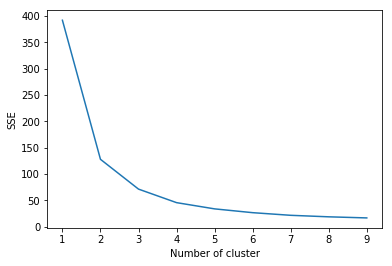

In [99]:
# clustering analysis goes here

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(train_X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


_with discussion here_
###### Cluster number is 5 that is good enough for the model.

## Task 2: Dimensionality Reduction via Decomposition
    
(1) Apply one  "global" dimensionality reduction technique, e.g., PCA or Non-negative Matrix Factorization (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) to the affordability data. 

In [84]:
#RegionId
region_df = utils.pivot_df(afford_df,['RegionName','SizeRank'],['RegionID'], 'RegionID')

region_df.head()

RegionID,394304,394312,394318,394347,394355,394357,394358,394367,394378,394388,...,395134,395148,395160,395167,395169,395183,395209,753899,753906,753924
date,,,,,,,,,,,,,,,,,,,,,
1979-03,0.232680,0.287440,0.241254,0.248301,0.281276,0.293120,0.241090,0.320604,0.279537,0.261269,...,0.329093,0.262781,0.233772,0.290762,0.237118,0.291715,0.254252,0.357694,0.324803,0.303692
1979-06,0.247157,0.313798,0.242736,0.264578,0.291680,0.320723,0.262005,0.344172,0.293638,0.272639,...,0.351231,0.275551,0.242763,0.336807,0.249160,0.309812,0.264869,0.388161,0.329214,0.350751
1979-09,0.253609,0.321006,0.241687,0.271742,0.306315,0.327072,0.264234,0.352533,0.305817,0.271228,...,0.362340,0.283997,0.239239,0.325960,0.253414,0.324721,0.277353,0.401762,0.325394,0.382342
1979-12,0.277786,0.356240,0.283188,0.312490,0.356599,0.369596,0.293461,0.388893,0.327856,0.325152,...,0.403449,0.327575,0.272597,0.374332,0.284488,0.365309,0.314773,0.459422,0.394464,0.447982
1980-03,0.320509,0.432043,0.365602,0.371988,0.400885,0.416118,0.341429,0.464336,0.360372,0.344529,...,0.474701,0.372208,0.304646,0.441749,0.330377,0.454627,0.373035,0.541508,0.429323,0.550050


In [139]:
# decomposition code here
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

train_rsX, train_rsy = utils.get_X_y_with_rs(train_df)

pca= PCA(n_components=2)
print(pca.fit(train_rsX))
print(pca.components_)
print(pca.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[ 9.99999992e-01  1.28496050e-04  8.07160844e-08  1.27651013e-07]
 [-1.28496114e-04  9.99999816e-01  4.24882791e-04  4.14021102e-04]]
[1.21396821e+09 1.87521726e+01]


In [141]:
X_pca = pca.transform(train_rsX)

print(X_pca)

[[ 3.92010737e+05 -4.99968130e+01]
 [-2.90125954e+03  9.55456895e-03]
 [-2.90199784e+03  2.62820592e-02]
 ...
 [-2.90214585e+03 -1.29328890e-01]
 [-2.90213673e+03 -1.21228155e-01]
 [-2.90212863e+03 -1.23604186e-01]]


In [142]:
print("original shape:   ", train_rsX.shape)
print("transformed shape:", X_pca.shape)

original shape:    (10575, 4)
transformed shape: (10575, 2)


(2) Plot the transformed data in two dimensions. Color regions based on clusters found in Task 1. Plot again coloring based on geography or size. Does the data in reduced dimension reflect any of these characteristics?

In [144]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(train_rsX)
print(train_rsX.shape)
print(projected.shape)

(10575, 4)
(10575, 2)


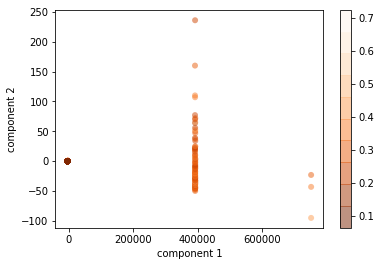

In [147]:
# plotting code here

plt.scatter(projected[:, 0], projected[:, 1],
            c=train_rsy, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Oranges_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

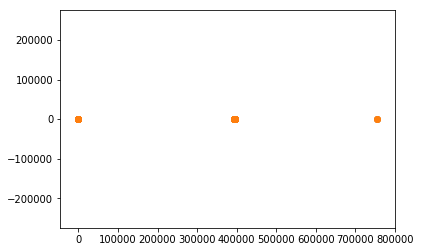

In [143]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(train_rsX[:, 0], train_rsX[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.decomposition import RandomizedPCA
model = RandomizedPCA(100).fit(train_rsX)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.title('RandomizedPCA')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

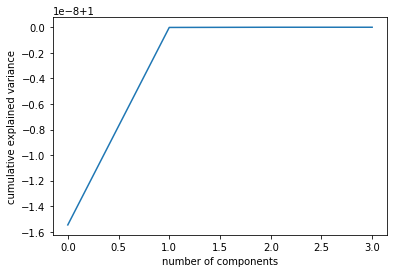

In [148]:
pca = PCA().fit(train_rsX)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

_decomposition discussion here_

##### To be honest, this plot doesn't make any sense to me. I believe I did it wrong.

## Task 3: Dimensionality Reduction via Manifold Learning
    
(1) Apply one  "local" dimensionality reduction technique, e.g., LLE or tSNE (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold) to the affordability data. 

In [154]:
# manifold code here
from sklearn.manifold import MDS
from scipy.stats import mode
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score

D = pairwise_distances(train_rsX)
D.shape

(10575, 10575)

In [ ]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)

(2) Plot the transformed data in two dimensions. Color regions based on clusters found in Task 1. Plot again coloring based on geography or size. Does the data in reduced dimension reflect any of these characteristics?

In [156]:
colorize = dict(c=train_rsX[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

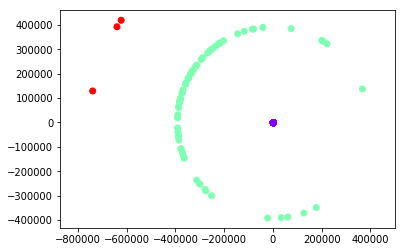

In [157]:
# plotting code here
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

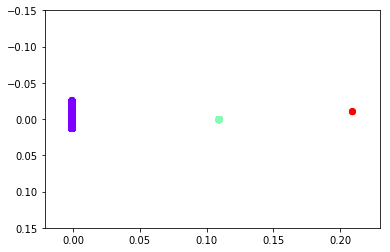

In [158]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(train_rsX)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

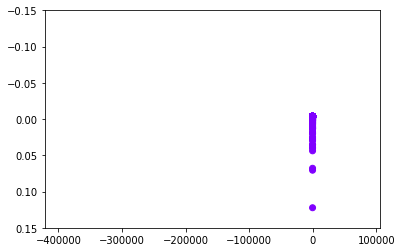

In [159]:
from sklearn.manifold import Isomap

model = Isomap(n_components=2)
out = model.fit_transform(train_rsX)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

_manifold discussion here_

_"This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data. In the case of MDS, the quantity preserved is the distance between every pair of points."_